In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm


%matplotlib inline
warnings.filterwarnings('ignore')
import platform
plt.rcParams['font.family'] = 'NanumGothic' 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 1) 데이터 불러오기
df = pd.read_csv('/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
# 요약정보
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
df.describe() # 수치형 변수 기술통계량

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [5]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [6]:
# Price 결측치 제거
df.dropna(subset=['Price'], inplace=True)
df[df['Price'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


In [7]:
# New_Price 컬럼 제거
df.drop('New_Price',axis=1,inplace=True)

In [8]:
# Mileage / Engine / Power / Seats 결측치 제거
df.dropna(subset=['Mileage','Engine','Power','Seats'],axis=0,inplace=True)

In [9]:
# 결측치 확인
df.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [10]:
# Power 열 null bhp 제거
# 수치상 null은 이상치로 판단하고 제거
df[df['Power'] == 'null bhp'] 
df = df[df['Power'] != 'null bhp'] # 제거

<Axes: >

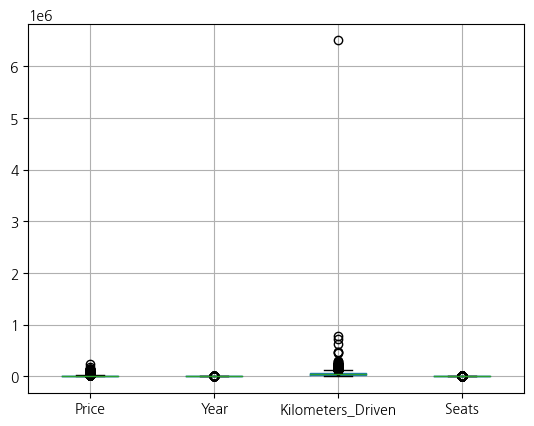

In [11]:
df.boxplot()

In [14]:
# kilometer 이상치

In [12]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','').astype('float')
df['Engine'] = df['Engine'].str.replace('CC','').astype('float')
df['Power'] = df['Power'].str.replace('bhp','').astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6053 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6053 non-null   object 
 1   Location           6053 non-null   object 
 2   Price              6053 non-null   float64
 3   Year               6053 non-null   int64  
 4   Kilometers_Driven  6053 non-null   int64  
 5   Fuel_Type          6053 non-null   object 
 6   Transmission       6053 non-null   object 
 7   Owner_Type         6053 non-null   object 
 8   Mileage            6053 non-null   float64
 9   Engine             6053 non-null   float64
 10  Power              6053 non-null   float64
 11  Seats              6053 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 614.8+ KB


In [14]:
df.Name.nunique()
# Name의 unique의 개수가 너무 많아 분석 및 판단에 이상이 있을 것이라 생각됨.
# Name에서 Brand명만 구분하여 사용하는 Brand 파생변수 생성

1856

In [15]:
# Name열 split 후 회사명(브랜드)만 리턴하는 함수
def extract_brand(text):
    return text.split()[0]

In [16]:
df['Brand'] = df['Name'].apply(extract_brand)
df['Brand'].head()

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: Brand, dtype: object

In [17]:
# Name 변수 제거
df.drop('Name',axis=1,inplace=True)

In [18]:
df.Brand.nunique()

29

In [19]:
df['Brand'].value_counts().sum()

6053

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Ambassador'),
  Text(25, 0, 'ISUZU'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Bentley'),
  Text(28, 0, 'Lamborghini')])

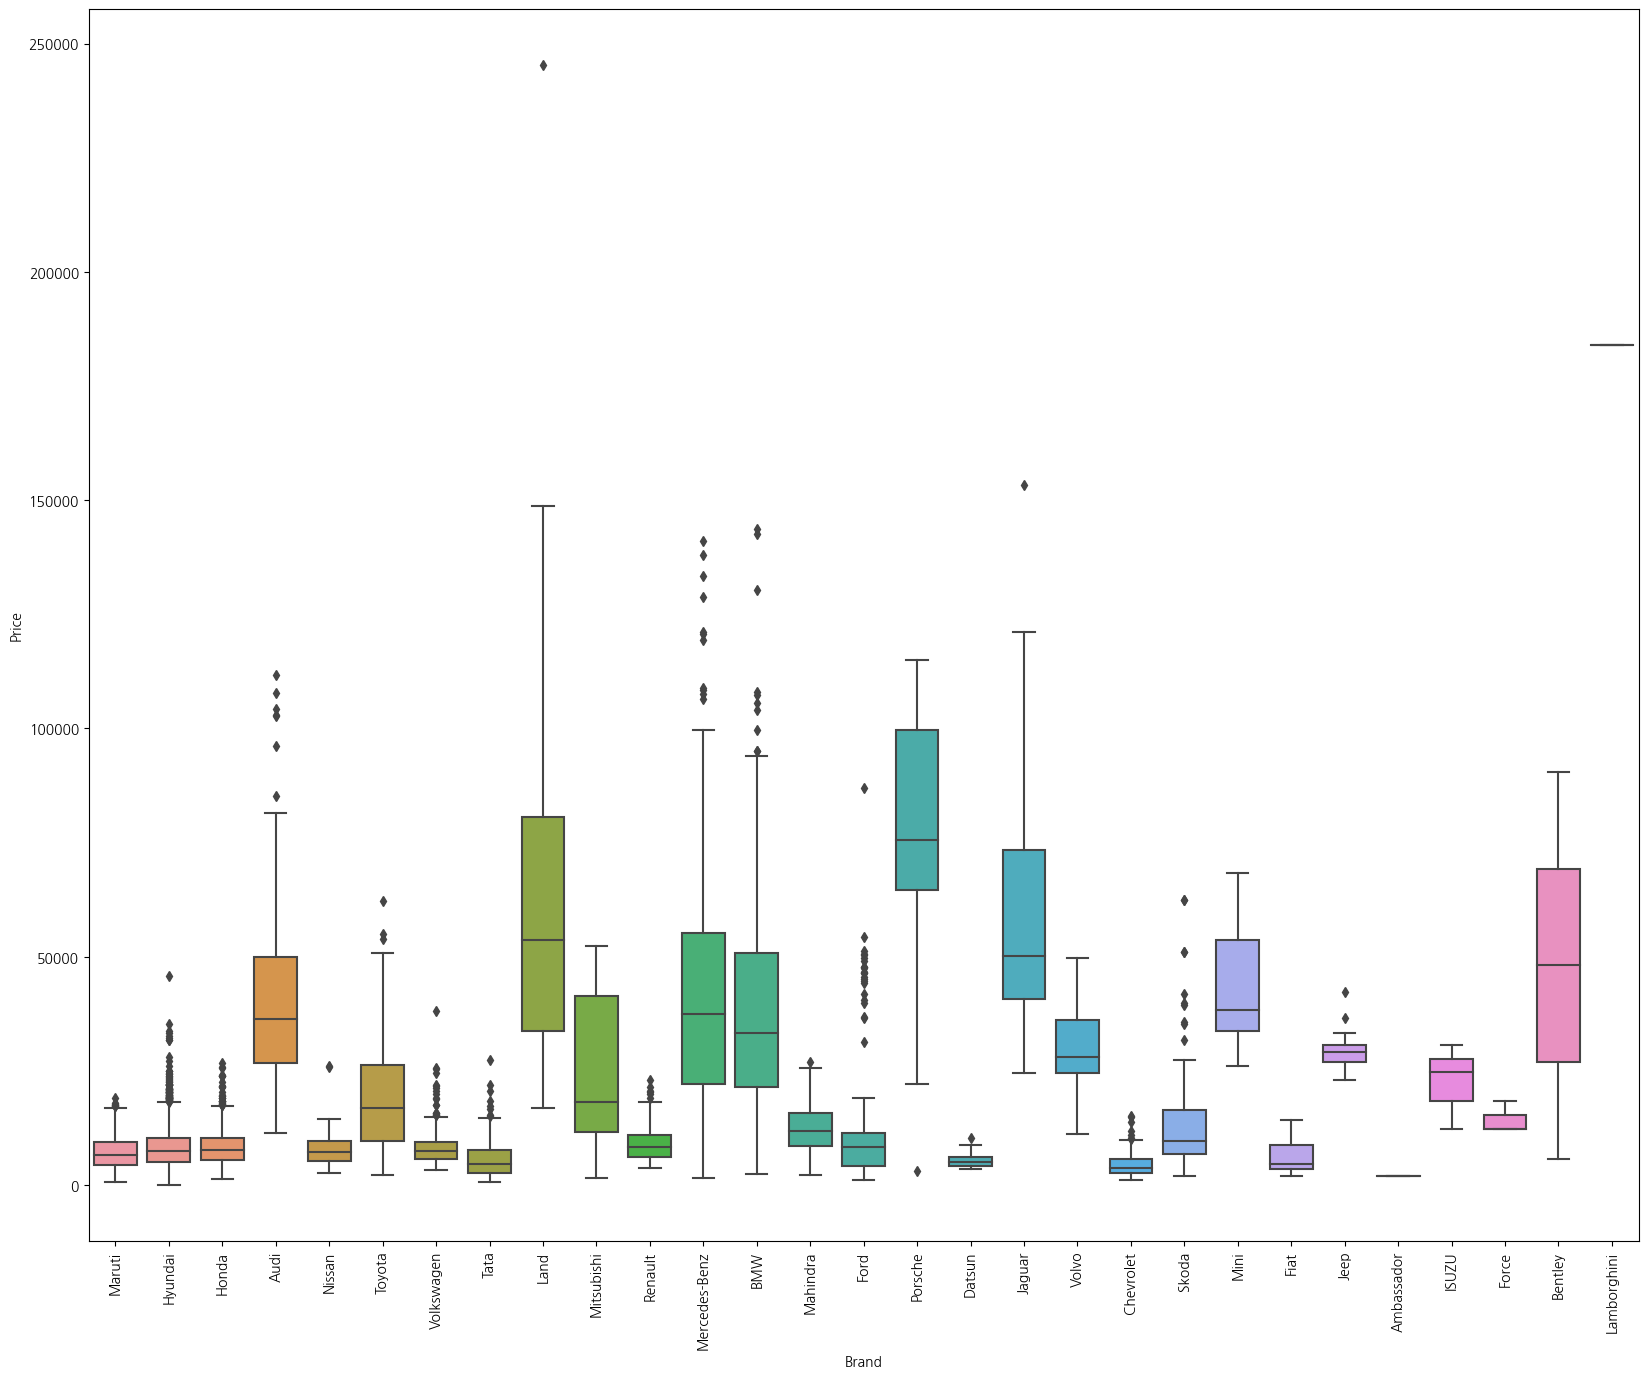

In [20]:
plt.figure(figsize=(20,16))
sns.boxplot(x='Brand',y='Price',data=df)
plt.xticks(rotation=90)

In [21]:
# Brand에서도 10개 이하로 분포하는 브랜드는 분석에 영향이 없을 것이라 판단하여 제거
# 한자리 수 차량 5개 제거 시작
brand_counts = df['Brand'].value_counts()
brand_counts

Maruti           1218
Hyundai          1079
Honda             614
Toyota            406
Mercedes-Benz     323
Volkswagen        320
Ford              298
Mahindra          278
BMW               268
Audi              240
Tata              192
Skoda             181
Renault           151
Chevrolet         120
Nissan             93
Land               57
Jaguar             43
Mitsubishi         34
Mini               29
Fiat               26
Volvo              21
Jeep               19
Datsun             17
Porsche            16
ISUZU               3
Force               3
Bentley             2
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

In [22]:
# 브랜드 행을 brand_count로 map하고 행 추가
df['Brand_count'] = df['Brand'].map(brand_counts)
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Brand_count
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,1218
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,1079
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,614
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,1218
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,240


In [26]:
# brand_count 행에서 10개 미만이 있는지 query 함수로 필터링
filtered_df = df.query("Brand_count < 10")
print(filtered_df)

        Location      Price  Year  Kilometers_Driven Fuel_Type Transmission  \
1221     Chennai    2069.50  2003              80000    Diesel       Manual   
2900      Jaipur   30659.20  2017              34429    Diesel    Automatic   
3624  Coimbatore   24665.33  2018              20422    Diesel       Manual   
4997     Chennai   18395.52  2014              50000    Diesel       Manual   
5182     Kolkata   12263.68  2014              41000    Diesel       Manual   
5206     Kolkata   12263.68  2014              41000    Diesel       Manual   
5521   Hyderabad   90444.64  2006              48000    Petrol    Automatic   
5781       Delhi  183955.20  2011               6500    Petrol    Automatic   
5979      Jaipur   12263.68  2017              25000    Diesel       Manual   
6354   Bangalore    5748.60  2008              31200    Petrol    Automatic   

     Owner_Type  Mileage  Engine   Power  Seats        Brand  Brand_count  
1221      Third     12.8  1489.0   35.50    5.0   Amba

In [23]:
# brand_count 수가 10개 미만인 열을 제거함
index_to_drop = df[df['Brand_count'] < 10].index
df.drop(index_to_drop, inplace=True)
print(df)

        Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0         Mumbai   2682.68  2010              72000       CNG       Manual   
1           Pune  19162.00  2015              41000    Diesel       Manual   
2        Chennai   6898.32  2011              46000    Petrol       Manual   
3        Chennai   9197.76  2012              87000    Diesel       Manual   
4     Coimbatore  27194.71  2013              40670    Diesel    Automatic   
...          ...       ...   ...                ...       ...          ...   
7228        Pune  10822.70  2016              41413    Diesel       Manual   
7231       Kochi  13474.72  2017              39015    Petrol       Manual   
7232      Mumbai  27838.55  2018               6000    Petrol       Manual   
7235       Kochi  16203.39  2017              21380    Diesel       Manual   
7236       Kochi      7.08  2018              23955    Petrol       Manual   

     Owner_Type  Mileage  Engine   Power  Seats    Brand  Brand

In [24]:
# 조건 필터링으로 제거된지 확인 / 결과 empty
filtered_df = df.query("Brand_count < 10")
print(filtered_df)

Empty DataFrame
Columns: [Location, Price, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Brand, Brand_count]
Index: []


In [25]:
# 다 사용한 brand_count는 필요없으므로 컬럼 제거
df.drop('Brand_count',axis=1,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep')])

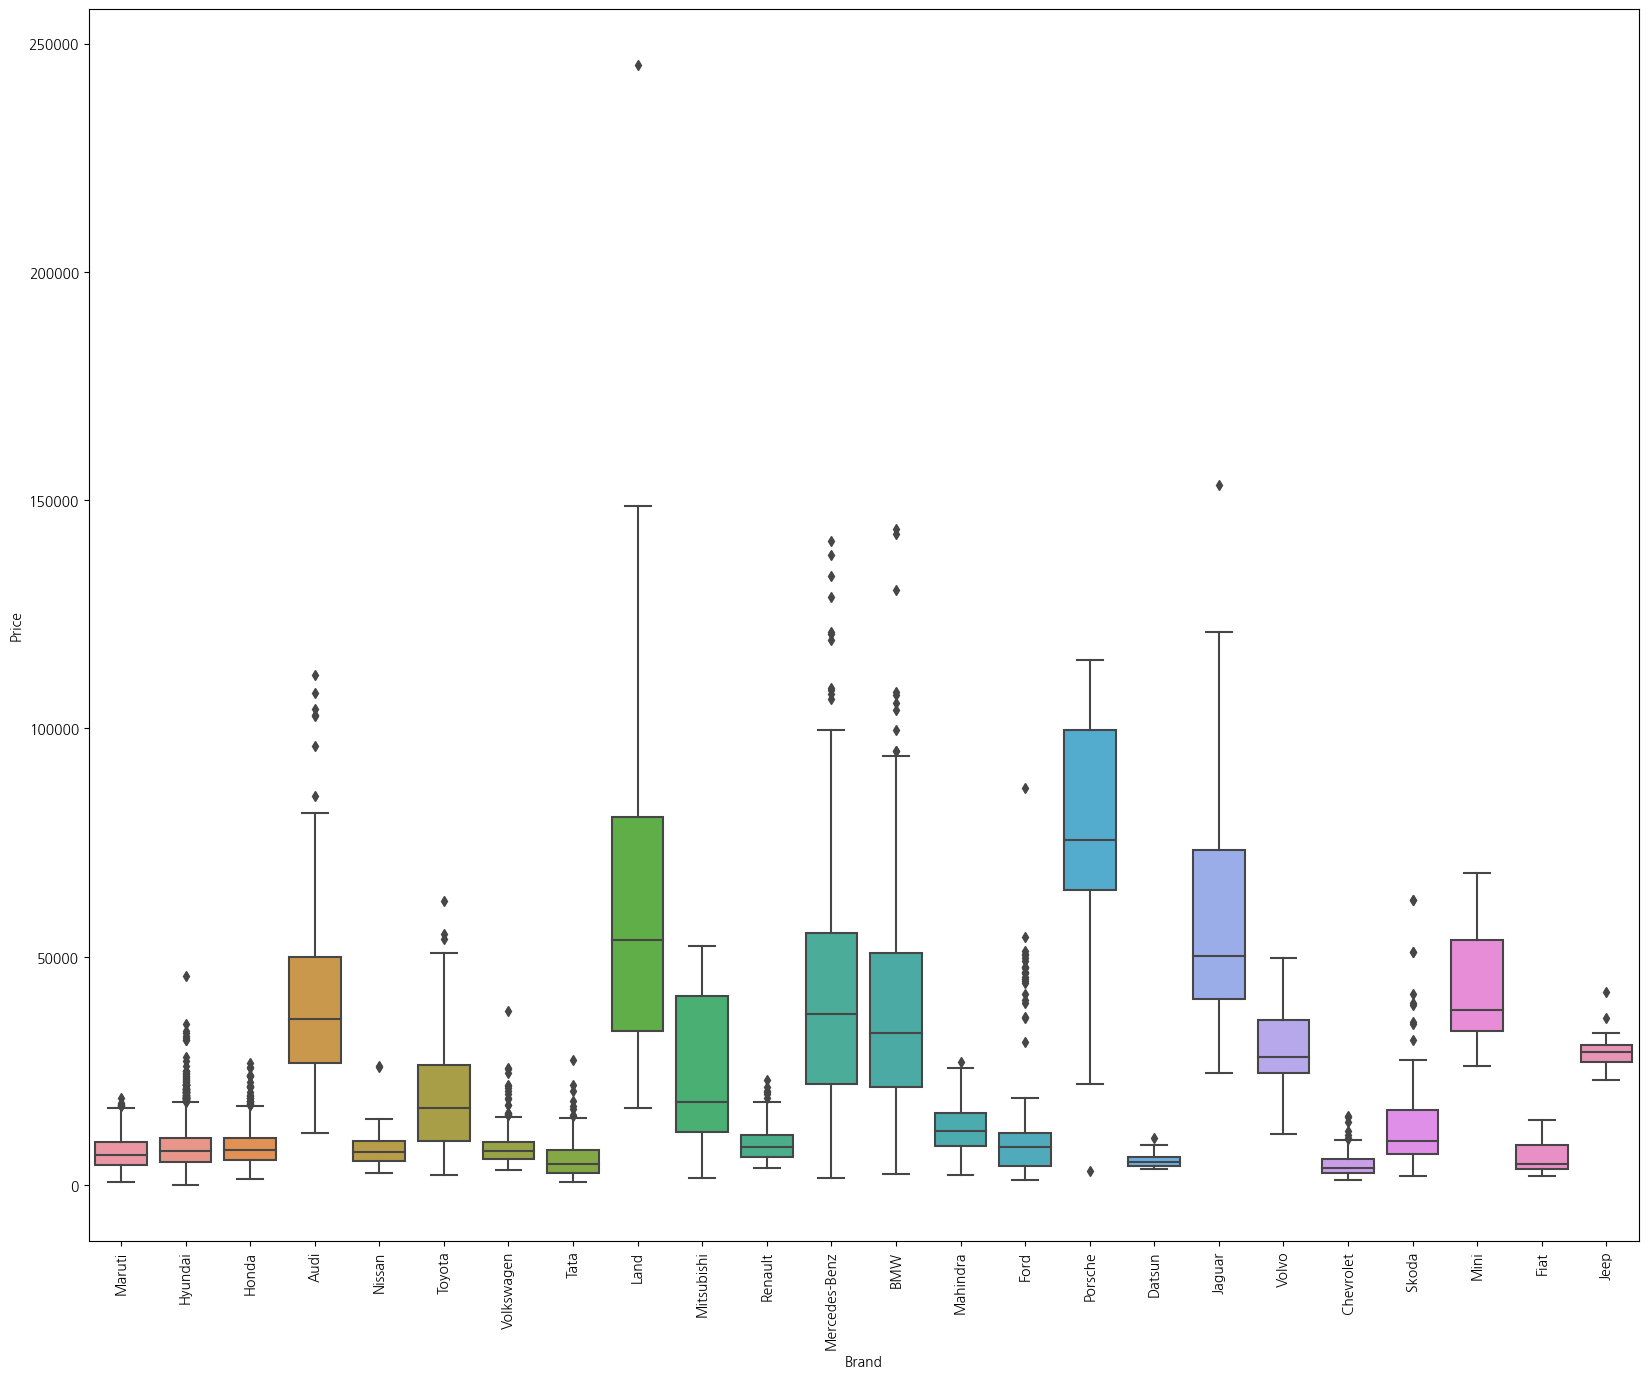

In [26]:
plt.figure(figsize=(20,16))
sns.boxplot(x='Brand',y='Price',data=df)
plt.xticks(rotation=90)

In [30]:
df['Size'].head()

0    light
1    small
2    small
3    small
4      mid
Name: Size, dtype: object

Text(0.5, 1.0, 'Seats')

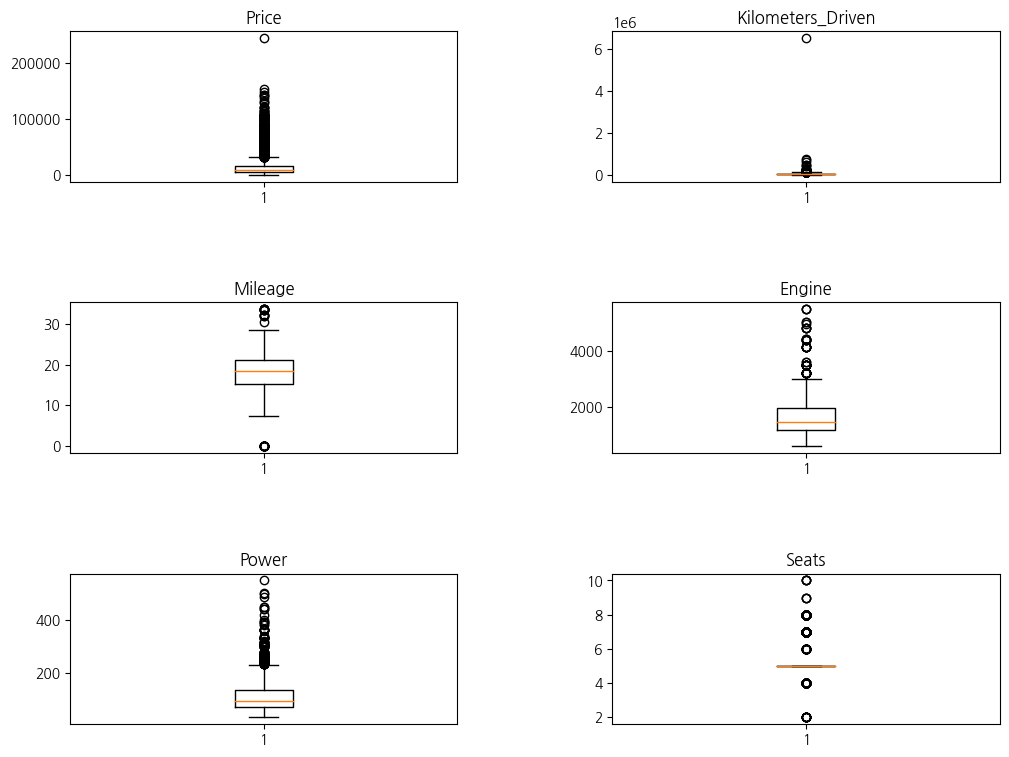

In [31]:
#이상치 재확인을 위한 box-plot
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.8)

axs[0].boxplot(df['Price'])
axs[0].set_title('Price')

axs[1].boxplot(df['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df['Power'])
axs[4].set_title('Power')

axs[5].boxplot(df['Seats'])
axs[5].set_title('Seats')

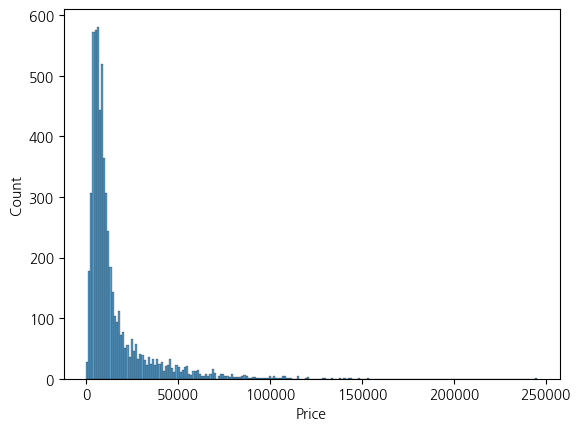

In [32]:
sns.histplot(df['Price'])
plt.show()

In [33]:
df['Price_log']=np.log(df['Price'])
df.drop("Price", axis=1, inplace=True)

<Axes: xlabel='Price_log', ylabel='Count'>

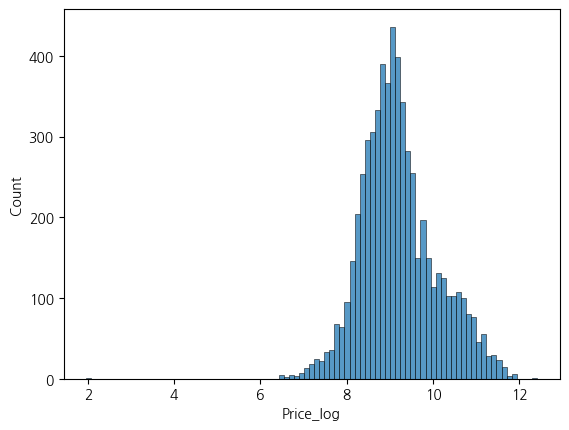

In [34]:
# 재확인
sns.histplot(df['Price_log'])

<Axes: xlabel='Power', ylabel='Count'>

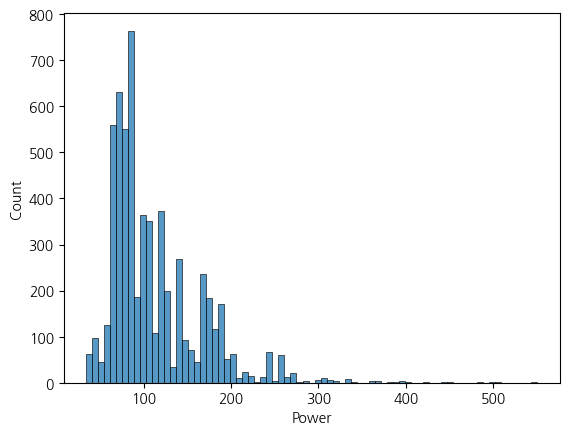

In [36]:
sns.histplot(df['Power'])

In [37]:
df['Power_log']=np.log(df['Power'])
df.drop("Power", axis=1, inplace=True)

<Axes: xlabel='Power_log', ylabel='Count'>

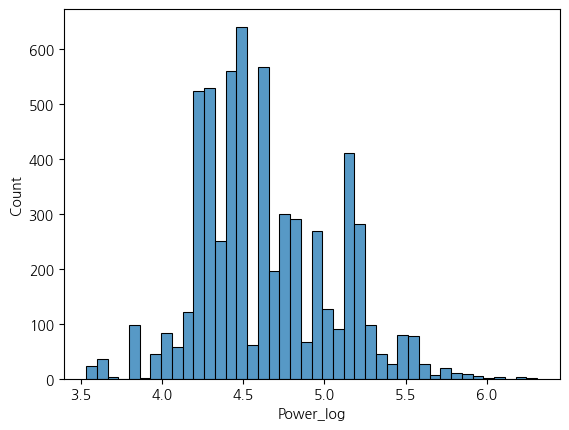

In [38]:
sns.histplot(df['Power_log'])

In [39]:
# 이상치 재확인
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price_log,Power_log
count,6043.000000,6.043000e+03,6043.000000,6043.000000,6043.000000,6043.000000,6043.000000
mean,2013.554195,5.776755e+04,18.332421,1621.504054,5.283138,9.198489,4.637033
std,3.163403,9.102873e+04,4.361214,594.607094,0.802857,0.874527,0.414794
min,1998.000000,1.710000e+02,0.000000,624.000000,2.000000,1.957274,3.532226
25%,2012.000000,3.282950e+04,15.290000,1198.000000,5.000000,8.615890,4.317488
50%,2014.000000,5.200000e+04,18.490000,1495.000000,5.000000,9.092814,4.550503
75%,2016.000000,7.200000e+04,21.120000,1984.000000,5.000000,9.686331,4.927978
max,2019.000000,6.500000e+06,33.540000,5461.000000,10.000000,12.410130,6.309918


In [55]:
# Kilometers_Driven max 값이 약 650만 키로로 이상치로 판단됨 -> 제거
# 앞서 boxplot에서 한개로 파악되었으므로 바로 제거
df = df[df['Kilometers_Driven'] < 300000]

In [42]:
# Mileage 열에서 min값이 0으로 이상치로 판단됨 -> 먼저 확인
# 데이터 수가 분석에 큰 영향을 주지 않을 것이라 판단하고 제거
df[df['Mileage'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Brand,Size,Price_log,Power_log
14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,5.0,Land,full,10.197157,4.744932
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,5.0,Mercedes-Benz,mid,10.909266,5.267858
544,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,5.0,Mercedes-Benz,mid,10.998261,5.200870
707,Pune,2014,120000,Diesel,Automatic,First,0.0,2987.0,5.0,Mercedes-Benz,full,10.736153,5.105945
962,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,5.0,Mercedes-Benz,mid,11.011256,5.267858
996,Pune,2008,93000,Petrol,Manual,First,0.0,1086.0,5.0,Hyundai,small,7.706518,4.127134
1059,Hyderabad,2010,58163,Petrol,Manual,First,0.0,1086.0,5.0,Hyundai,small,8.231043,4.127134
1259,Bangalore,2010,125000,Diesel,Automatic,Second,0.0,2179.0,5.0,Land,full,9.732851,4.744932
1308,Bangalore,2014,33000,Diesel,Automatic,Second,0.0,2987.0,5.0,Mercedes-Benz,full,11.096156,5.105945
1354,Kochi,2011,20842,Petrol,Manual,First,0.0,1086.0,5.0,Hyundai,small,8.357407,4.127134


In [46]:
df=df[df['Mileage']!=0]

In [51]:
ydf[df['Mileage'] == 0] # 제거 확인

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Brand,Size,Price_log,Power_log


In [56]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price_log,Power_log
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,2013.558682,56133.620110,18.417977,1618.510571,5.284834,9.195398,4.635905
std,3.162622,33337.759375,4.190076,591.982276,0.804960,0.870709,0.414242
min,1998.000000,171.000000,7.500000,624.000000,2.000000,1.957274,3.532226
25%,2012.000000,32829.500000,15.350000,1198.000000,5.000000,8.615890,4.317488
50%,2014.000000,52000.000000,18.500000,1493.000000,5.000000,9.092814,4.543295
75%,2016.000000,72000.000000,21.140000,1969.000000,5.000000,9.682036,4.927978
max,2019.000000,299322.000000,33.540000,5461.000000,10.000000,12.410130,6.309918


In [52]:
#  EDA